## **Modelo de teste em regressão linear**

**Teste do Modelo de regressão com método analítico fechado**

In [66]:
# Importando principais bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [67]:
# Gerando dados para o modelo
np.random.seed(7)

X = 4*np.random.rand(200, 1)
y = 2 + 3*X + np.random.randn(200, 1)
data = {'Var_X':[x for x in X], 'Var_Y':[y for y in y]}
df = pd.DataFrame(data, columns=['Var_X', 'Var_Y'])
df.head()

,Var_X,Var_Y
0,[0.3052331574958287],[1.359411825638794]
1,[3.1196751689604585],[12.11775070743586]
2,[1.753636925763574],[8.467192971406568]
3,[2.893860711323765],[11.662139118809261]
4,[3.9119580479864107],[12.806550328852994]


Testando regressão pelo metodo fechado analítico (equação matricial). Saídas correspondem aos coeficientes de variação (angular) e de interceptação. Esse método extrai os valores exatos para cada coeficiente, porém o gasto computacional pode ser muito elevado dado um conjunto de dados com grandes tamanhos.

$\hat{\theta} = (X^TX)^{-1}X^Ty$

In [12]:
Xb = np.c_[np.ones(X.shape), X]
theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)
theta

array([[2.01777976],
       [2.97603138]])

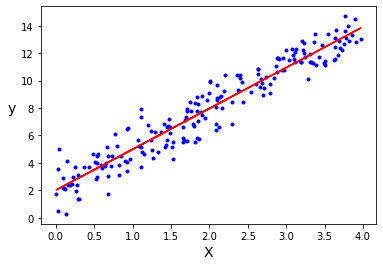

In [20]:
y_pred = Xb.dot(theta)

plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)
plt.show()

**Teste do Modelo de regressão com biblioteca do scikit-learn**

In [21]:
LR = LinearRegression()
LR.fit(X, y)

LR.intercept_, LR.coef_

(array([2.01777976]), array([[2.97603138]]))

Método produz resultados praticamente idênticos ao método fechado

**Teste do Modelo de regressão com método do gradiente descendente estocástico**

In [22]:
SGD = SGDRegressor(max_iter=1000, tol=1e-6, eta0=0.01, penalty=None, random_state=7)
SGD.fit(X, np.ravel(y))

y_pred_SGD = SGD.predict(X)

SGD.intercept_, SGD.coef_

(array([1.93831671]), array([2.99402094]))

**Teste do Modelo de regressão com método de regularização Ridge e Lasso para redução da variância entre os dados**

**Ridge Regression**

In [23]:
RidgeSGD = SGDRegressor(max_iter=1000, tol=1e-6, eta0=0.01, penalty='l2', alpha=0.01, random_state=7)
RidgeSGD.fit(X, np.ravel(y))

y_pred_RidgeSGD = RidgeSGD.predict(X)

RidgeSGD.intercept_, RidgeSGD.coef_

(array([1.97810841]), array([2.97261566]))

**Lasso Regression**

In [24]:
LassoSGD = SGDRegressor(max_iter=10000, tol=1e-6, eta0=0.01, penalty='l1', alpha=0.01, random_state=7)
LassoSGD.fit(X, np.ravel(y))

y_pred_LassoSGD = LassoSGD.predict(X)

LassoSGD.intercept_, LassoSGD.coef_

(array([1.95152839]), array([2.98689907]))

**Comparando os modelos**

Text(0.5, 1.0, 'SGD Lasso Regression')

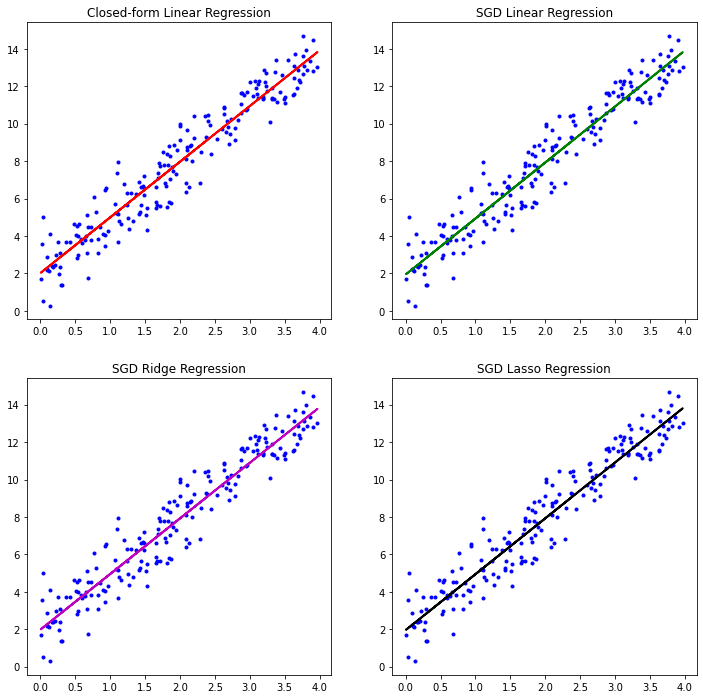

In [25]:
fig, axs = plt.subplots(2,2, figsize=(12,12))

for i in range(2):
  for j in range(2):
    axs[i, j].plot(X, y, 'b.')

axs[0, 0].plot(X, y_pred, 'r-', linewidth=2)
axs[0, 0].set_title("Método Fechado")

axs[0, 1].plot(X, y_pred_SGD, 'g-', linewidth=2)
axs[0, 1].set_title("Gradiente Estocático")

axs[1, 0].plot(X, y_pred_RidgeSGD, 'm-', linewidth=2)
axs[1, 0].set_title("Gradiente ")

axs[1, 1].plot(X, y_pred_LassoSGD, 'k-', linewidth=2)
axs[1, 1].set_title("SGD Lasso Regression")

In [41]:
data = {'Método':['Fechado', 'Gradiente Descendente Estocástico', 'Regularização Ridge', 'Regularização Lasso'], 
        'Score':[str(round(r2_score(y, y_pred)*100,3))+'%',str(round(r2_score(y, y_pred_SGD)*100,3))+'%'
                 , str(round(r2_score(y, y_pred_RidgeSGD)*100,3))+'%', str(round(r2_score(y, y_pred_LassoSGD)*100,3))+'%']}

df2 = pd.DataFrame(data, columns=['Método', 'Score'])
df2.head()

,Método,Score
0,Fechado,92.215%
1,Gradiente Descendente Estocástico,92.196%
2,Regularização Ridge,92.197%
3,Regularização Lasso,92.197%


## **Modelo de Teste de Regressão Polinomial**

In [45]:
# Gerando dataset de dados

np.random.seed(7)

X2 = 4*np.random.rand(200, 1) - 1
y2 = 2 + 2*X2**2 + np.random.randn(200, 1)

data = {'Var_X':[x for x in X2], 'Var_Y':[y for y in y2]}
df = pd.DataFrame(data, columns=['Var_X', 'Var_Y'])
df.head()

,Var_X,Var_Y
0,[-0.6947668425041713],[1.4091142840377398]
1,[2.1196751689604585],[11.744770844369581]
2,[0.753636925763574],[4.342219425864588]
3,[1.8938607113237649],[10.15397377262948]
4,[2.9119580479864107],[18.029675531359416]


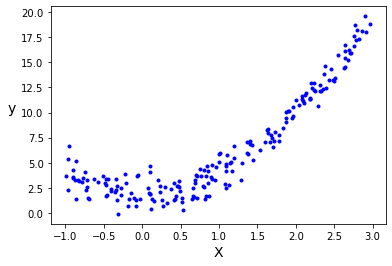

In [44]:
plt.plot(X2, y2, 'b.')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)
plt.show()

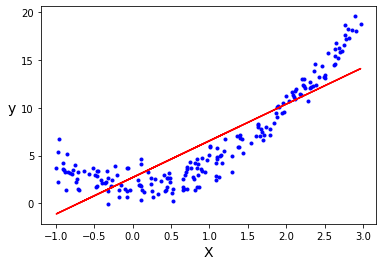

In [47]:
# Modelo apresenta um underfiting quando utilizado o método de regressão linear sem pré-processamento dos dados

LR = LinearRegression()
LR.fit(X2, y2)

y2_pred = LR.predict(X2)

plt.plot(X2, y2, 'b.')
plt.plot(X2, y2_pred, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)
plt.show()

In [49]:
# Reduzindo a dimensão dos dados

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
Xp = polyFeatures.fit_transform(X2)

print(X2.shape, Xp.shape)
Xp[0:3]

(200, 1) (200, 2)


array([[-0.69476684,  0.48270097],
       [ 2.11967517,  4.49302282],
       [ 0.75363693,  0.56796862]])

In [50]:
# Realizando novamente o modelo de regressão

PR = LinearRegression()
PR.fit(Xp, y2)

PR.intercept_, PR.coef_

(array([2.00116874]), array([[0.01558909, 1.97950862]]))

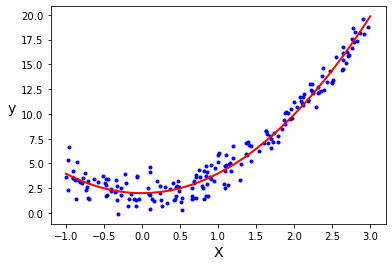

In [52]:
# Visualizando o modelo dos dados

Xn = np.linspace(-1, 3, 200).reshape(200, 1)
Xnp = polyFeatures.transform(Xn)
y2_pred_PR = PR.predict(Xnp)

plt.plot(X2, y2, 'b.')
plt.plot(Xn, y2_pred_PR, 'r-', linewidth=2)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)
plt.show()

### Modelo de regressão para previsão de preço de venda de carros

In [57]:
# Carregando dados
df = pd.read_csv("car_data.csv")

# mostrando as primeiras linhas do arquivo.
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


In [58]:
# Realizando mudança de dimensão no dados categóricos

df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


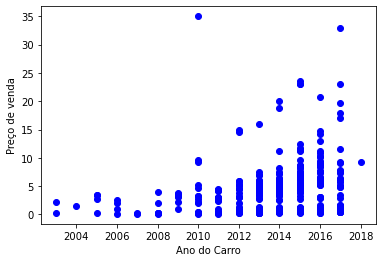

In [59]:
# Visualizando a quantidade de carros por ano em relação ao preço de venda
plt.scatter(df['ano'], df['preco_venda'],  color='blue')
plt.xlabel("Ano do Carro")
plt.ylabel("Preço de venda")
plt.show()

In [60]:
# Definindo variáveis para o modelo
x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']]
y = df[['preco_venda']]

In [61]:
# Separando os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [62]:
# Realizando Treinamento do Modelo

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [63]:
# Testando a eficiência do modelo
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.7400163777243574

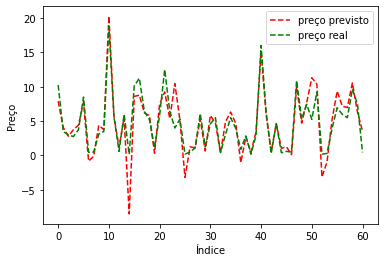

In [64]:
# Visualizando dados

plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

## **Modelo de Regressão para Preços de Casas**

In [68]:
# Lendo os dados

data = pd.read_csv('https://raw.githubusercontent.com/llSourcell/math_of_machine_learning/master/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [69]:
# Selecionando variáveis do modelo
area = data['sqft_living'].to_numpy().reshape(-1, 1)  # predictor
price = data['price'].to_numpy().reshape(-1, 1)       # target 

In [70]:
# Realizando a normalização dos dados
MinMax = MinMaxScaler()
area = MinMax.fit_transform(area)
price = MinMax.fit_transform(price)

In [71]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(area, price, test_size=0.20, random_state=7)

In [72]:
# Criando o modelo de regressão
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [83]:
# Analisando a eficiência do modelo
y_test_predicted = LR.predict(X_test)

r2 = r2_score(y_test, y_test_predicted)             
RMSE = np.sqrt( mean_squared_error(y_test, y_test_predicted) )

data = {'Medidas':['R2 Score', 'Erro Médio Quadrático'], 'Valor':[str(round(r2*100,2))+'%', str(round(RMSE*100,2))+'%']}
df3 = pd.DataFrame(data, columns=['Medidas', 'Valor'])
df3.head()

,Medidas,Valor
0,R2 Score,48.33%
1,Erro Médio Quadrático,3.43%
